Based on: 

https://www.tensorflow.org/get_started/mnist/beginners 

https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from utils import display_digit

In [3]:
# load data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
learning_rate = 1e-4
learning_rate = 0.5

batch_size = 100
training_set_size = mnist.train.labels.shape[0]

In [10]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
#train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for i in range(training_set_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        if i % 100 == 0:
          train_accuracy = accuracy.eval(feed_dict={
              x: batch_xs, y_: batch_ys, keep_prob: 1.0})
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

    prediction = tf.argmax(y,1)
    pred = prediction.eval(feed_dict={x: mnist.test.images}, session=sess)

0.9302


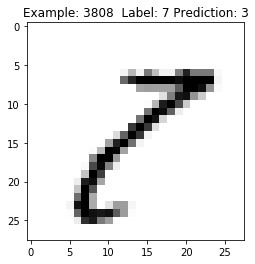

In [12]:
labels = mnist.test.labels.argmax(axis=1)
errors = np.where(pred != labels)[0]

random_error_indx = errors[np.random.randint(errors.size, size=1)[0]]
display_digit(mnist.test, random_error_indx, pred[random_error_indx])